# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# 1. Read the dataset given in file named 'bigcity.csv'.

In [1]:
import pandas as pd # Import the library.

In [2]:
data = pd.read_csv('bigcity.csv') # Read the data.

In [3]:
data.head() # Gives first 5 rows of data.

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


In [4]:
data.info() 
# Prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
u    49 non-null int64
x    49 non-null int64
dtypes: int64(2)
memory usage: 864.0 bytes


# 2. Transform the dataset (0.5 points)
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [5]:
data.shape # Gives a tuple as dimension of data.

(49, 2)

In [6]:
print('Number of rows in dataset: ',data.shape[0]) # Select the first element of tuple (49, 2).

Number of rows in dataset:  49


In [7]:
X = data.iloc[:, :-1].values #Select all columns without last. In this case total 2 columns, so it selects 1 column.
y = data.iloc[:, 1].values #Selects the last column of dataframe

# 3. Check the dataset for any missing values and also print out the correlation matrix (0.5 points)
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [8]:
data.isna().sum() # Gives the sum of null values.

u    0
x    0
dtype: int64

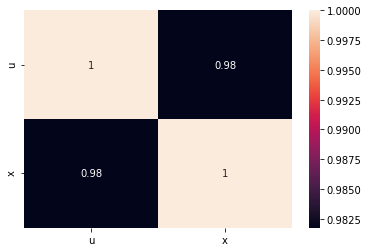

In [9]:
import seaborn as sns # Import data visualization library for statistical graphics
import matplotlib.pyplot as plt # Import data visualization library
%matplotlib inline

corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
# Plot of correlation matrix

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 4. Split data into train, test sets (0.5 points)
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [11]:
print('X_train shape:', X_train.shape) # Print shape of data
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('X_test shape:', X_test.shape)

X_train shape: (39, 1)
y_train shape: (39,)
X_test shape: (10, 1)
X_test shape: (10, 1)


# 5. Find coefficients & intercept (0.5 points)
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) # Fitting Linear Regression to the Training set

print('Coefficient b1', regressor.coef_)
print('Intercept b0', regressor.intercept_)

Coefficient b1 [1.16465537]
Intercept b0 9.571154371312304


In [13]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

# 6.  Linear Relationship between feature and target (0.5 points)
Plot the line with b1 and b0 as slope and y-intercept.

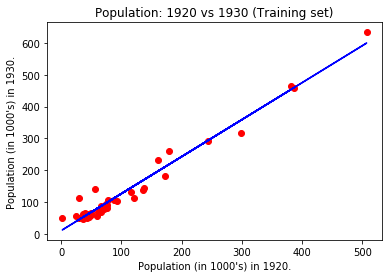

In [14]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Population: 1920 vs 1930 (Training set)')
plt.xlabel("Population (in 1000's) in 1920.")
plt.ylabel("Population (in 1000's) in 1930.")
plt.show()

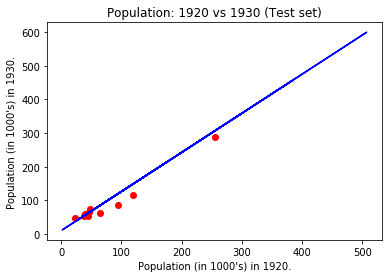

In [15]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Population: 1920 vs 1930 (Test set)')
plt.xlabel("Population (in 1000's) in 1920.")
plt.ylabel("Population (in 1000's) in 1930.")
plt.show()

# 7. Evaluation of model with scikit-learn (0.5 points)
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print("Root Mean Square Error: ", rmse)
print("R2 Score:", r2)

Root Mean Square Error:  18.71070389373071
R2 Score: 0.92536721776934


# 8. Calculate the accuracy of the model for both training and test data set (0.5 points)

Hint: .score() function

In [17]:
print('Accuracy of training data set: ', regressor.score(X_train, y_train))
print('Accuracy of testing data set: ', regressor.score(X_test, y_test))

Accuracy of training data set:  0.9652735334606501
Accuracy of testing data set:  0.92536721776934


# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [18]:
import pandas as pd # Import Python Data Analysis Library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Collect and load data

In [19]:
data1 = pd.read_csv("usedcars.csv") # Load data

In [20]:
data1.head() # Gives first 5 rows of data

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


# 3. Explore numeric variables - five number summary

In [21]:
data1.describe()
# Gives Descriptive statistics (The central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.)

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

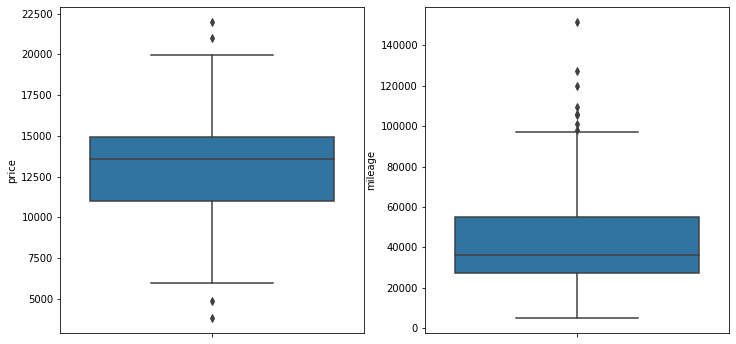

In [22]:
# Box-plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.
plt.figure(figsize=(12,6)) # Set figure size
plt.subplot(1, 2, 1)
sns.boxplot(y='price',data=data1) # Boxplot of price
plt.subplot(1, 2, 2)
sns.boxplot(y='mileage',data=data1) # Boxplot of mileage
plt.show()

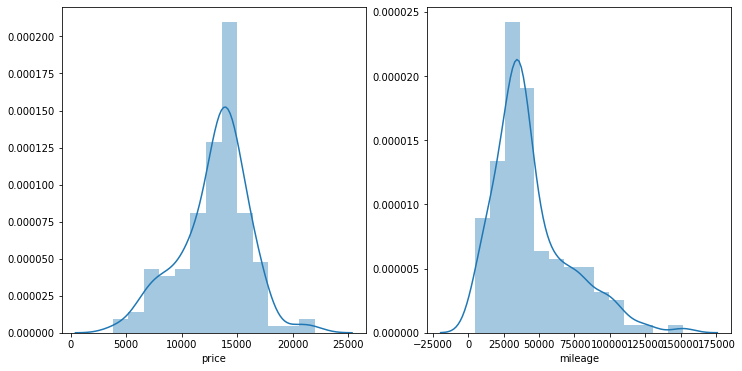

In [23]:
# Histogram is a flexible plot of a univariate distribution of observations.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.distplot(data1['price']) # Histogram of price
plt.subplot(1, 2, 2)
sns.distplot(data1['mileage']) # Histogram of mileage
plt.show()

In [24]:
stats = pd.DataFrame() # Create empty dataframe
stats["price_mean"] = data1.iloc[:, [2,3]].mean() # Create column = "price_mean" with values as mean of values all rows of column 2 (price) and column 3 (mileage).
stats["price_std"] = data1.iloc[:, [2,3]].std() # column as Standard Deviation
stats["price_var"] = data1.iloc[:, [2,3]].var() # column as Variance
"""Now we will take transpose, it will interchange columns with rows and rows with columns."""
stats.T # Transpose of dataframe for better look.

,price,mileage
price_mean,1.296193e+04,4.426065e+04
price_std,3.122482e+03,2.698210e+04
price_var,9.749892e+06,7.280340e+08


# 4. Explore categorical variables

In [25]:
data1.select_dtypes(include=['object']).describe() # Describe categorical variables.

,model,color,transmission
count,150,150,150
unique,3,9,2
top,SE,Black,AUTO
freq,78,35,128


# 5. Explore relationships between variables using scatterplots and two-way cross tabulations

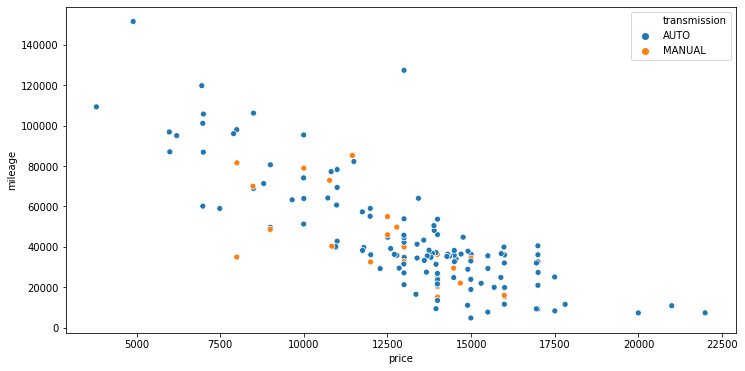

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="price", y="mileage", hue="transmission", data=data1) # Scatterplot between price and mileage with colour varying as transmission type.
plt.show()

In [27]:
pd.crosstab(data1.year, data1.transmission) # Computes a frequency table of the factors (count of auto/manual type with corresponding year).

transmission,AUTO,MANUAL
year,,
2000,3,0
2001,1,0
2002,1,0
2003,1,0
2004,3,0
2005,2,0
2006,5,1
2007,7,4
2008,10,4


In [28]:
pd.crosstab(data1.year, data1.model) # Computes a frequency table of the factors (count of car model type with corresponding year).

model,SE,SEL,SES
year,,,
2000,3,0,0
2001,1,0,0
2002,1,0,0
2003,0,0,1
2004,1,0,2
2005,0,0,2
2006,3,0,3
2007,5,0,6
2008,11,0,3
